# KNN 수치(회귀)예측(p.69)

* 새 데이터포인터(테스트용 데이터 레코드 1개)의 수치예측을 위해서 <br> 훈련데이터셋에서 가장 가까운 특성을 가진 혼련데이터 포인트를 찾음
* knn 기법으로 도출된 특성이 유사한 훈련데이터의 데이터포인트(레코드)들 간의 <br><font color = red>평균값</font>을 새 데이터포인터의 예측값으로 사용함

## (1) knn 회귀예측의 원리

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

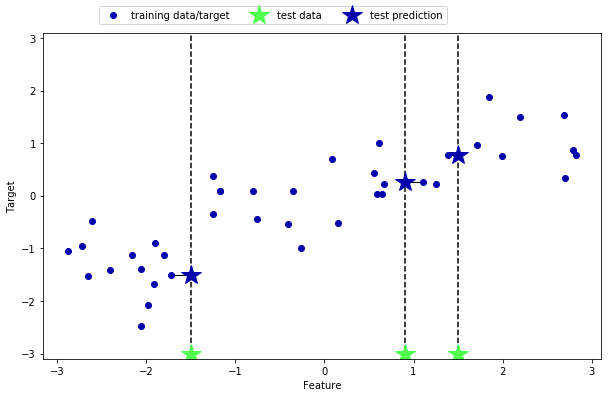

In [4]:
# 최근접 이웃을 1개 설정하는 경우
mglearn.plots.plot_knn_regression(n_neighbors = 1)
# - mglearn의 해당 그래픽 메서드에 디폴트로 들어 있는 그림임
# - 새로운 데이터포인트의 수치예측값은 가장 가까운 훈련데이터 이웃의 수치 타깃값을 그대로 사용함
# - k갯수를 낮출수록 모델이 복잡해지지만, 훈련데이터에만 정확하고, 테스트데이터에는 오차가 많은 과대적합 가능성이 큼

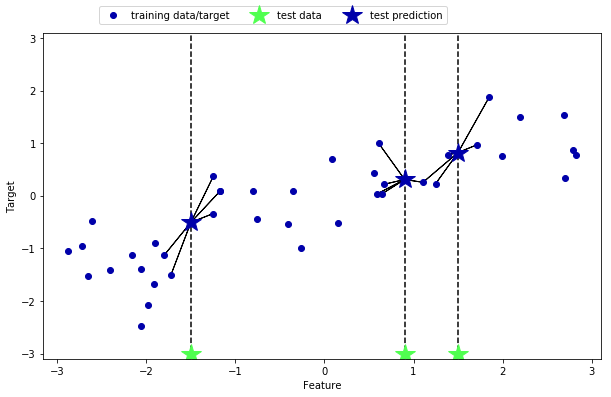

In [5]:
# 최근접 이웃을 여러 개 설정하는 경우
mglearn.plots.plot_knn_regression(n_neighbors = 5)
# - mglearn의 해당 그래픽 메서드에 디폴트로 들어 있는 그림임
# - 새로운 데이터포인트의 예측값은 어려 개의 훈련데이터 이웃의 타깃값의 평균을 사용함
# - k갯수를 늘릴수록 모델이 단순해지지만, 
#   훈련모델 자체의 정확도가 낮아서 테스트데이터의 예측값도 오차가 많은 과소적합 가능성 큼

## (2) knn 회귀예측의 장단점

### k-NN 장점
* 이해하기 쉬운 모델이며, 간단한 매개변수 설정으로 좋은 성능 발휘함
* 복잡한 알고리즘 적용전에 시도해 볼 수 있는 시작모델임

### k-NN 단점
* 훈련세트가 크면(피처갯수, 샘플수) 속도가 느리며, 특히 피처가 수백개 이상인 경우 잘 동작하지 않음
* 피처의 값 대부분이 0인 희소한 데이터셋에서는 잘 작동하지 않음

## (3) knn 회귀예측 주요 파라미터

### metric: 데이터포인트 사이의 거리를 재는 방법
* 유클리디안 거리: 기하학적 최단거리로 거리차이의 제곱을 모두 더함, 기본적으로 여러환경에서 잘 작동함 
* 맨하튼 거리: 거리차이의 절대값을 모두 더함
* 마할라노비스 거리: 데이터의 분포에서 개별 데이터포인트가 얼마나 떨어져 있나를 계산

### n_neighbors: 최근접 이웃갯수
* k갯수를 낮출수록 모델이 복잡해지지만, 훈련데이터에만 정확하고, 테스트데이터에는 오차가 많은 과대적합 가능성이 큼
* k갯수를 늘릴수록 모델이 단순해지지만, 훈련모델 자체의 정확도가 낮아서 테스트데이터의 예측값도 오차가 많은 과소적합 가능성 큼

# mglearn(뮐가런) 예제데이터셋: <font color = red>wave</font> (수치예측용)

## (1) mglearn <font color = blue>패키지(라이브러리)</font> 통째로 로딩

In [6]:
# mglearn(뮐가런) 패키지의 모든 모듈을 메모리로 로딩
import mglearn
# - import mglearn as mg 처럼 별칭을 사용해서 로딩한다면, 
#   이후 과정은 mglearn 대신에 mg로 사용해야함

In [7]:
# (실행하지 않고, 점(.)다음에 탭키를 눌러보기) 
# 탭키를 눌러보기)mglearn 패키지에 속한 모듈-메서드 확인 방법
mglearn. 
# - mglearn 패키지의 모듈 목록을 볼 수 있음
mglearn.datasets. 
# - datasets모듈에 속한 다양한 메서드 중에서 
#   load_OOO이라는 메서드를 이용해 예제데이터셋을 로딩 할 수 있음
#   make_OOO이라는 메서드를 이용해 예제데이터셋을 생성 할 수 있음

SyntaxError: invalid syntax (<ipython-input-7-8583186db3c7>, line 3)

In [8]:
# mglearn 패키지의 datasets 모듈에 속한 wave 데이터셋 생성
wave = mglearn.datasets.make_wave()
wave
# - n_samples = 40으로 일부샘플만 로딩할 수 있음
# - sklearn.datasets.load_OOO()에서는 이 옵션이 없음

(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816],
        [-2.06403288],
        [-2.65149833],
        [ 2.19705687],
        [ 0.60669007],
        [ 1.24843547],
        [-2.87649303],
        [ 2.81945911],
        [ 1.99465584],
        [-1.72596534],
        [-1.9090502 ],
        [-1.89957294],
        [-1.17454654],
        [ 0.14853859],
        [-0.40832989],
        [-1.25262516],
        [ 0.67111737],
        [-2.16303684],
        [-1.24713211],
        [-0.80182894],
        [-0.26358009],
        [ 1.71105577],
        [-1.80195731],
        [ 0.08540663],
        [ 0.55448741],
        [-2.72129752],
        [ 0.64526911],
        [-1.97685526],
        [-2.60969044],
        [ 2.69331322],
        [ 2.7937922 ],
        [ 1.85038409],
        [-1.17231738],
        [-2.41396732],
        [ 1.10539816],
        [-0.35908504],
        [-2.26777059],
        [-0.02893854],
        [-2.79366887],
        [ 2

## (2) mglearn 패키지 중 <font color = blue>예제데이터셋 모듈</font>을 로딩

In [9]:
# mglearn(뮐가런) 패키지에 속한 모듈중에서 datasets 모듈만 메모리로 로딩
from mglearn import datasets 
# - from mglearn import datasets as skd처럼 별칭을 사용해서 로딩한다면,
#   이후 과정은 datasets 대신에 skd로 사용해야 함

In [10]:
# (실행하지 않고, 점(.)다음에 탭키를 눌러보기) 
# mglearn 패키지의 datasets 모듈에 속한 메서드 확인 방법
datasets.
# - 점(.)다음에 탭키를 눌러보자
# - datasets모듈에 속한 다양한 메서드 중에서 
#   load_OOO이라는 메서드를 이용해 예제데이터셋을 로딩 할 수 있음
#   make_OOO이라는 메서드를 이용해 예제데이터셋을 생성 할 수 있음

# - n_samples = 40으로 일부샘플만 로딩할 수 있음
# - sklearn.datasets.load_OOO()에서는 이 옵션이 없음

SyntaxError: invalid syntax (<ipython-input-10-9b300d23880a>, line 3)

In [11]:
# mglearn 패키지의 datasets 모듈에 속한 wave 데이터셋 생성
wave = datasets.make_wave()
wave

(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816],
        [-2.06403288],
        [-2.65149833],
        [ 2.19705687],
        [ 0.60669007],
        [ 1.24843547],
        [-2.87649303],
        [ 2.81945911],
        [ 1.99465584],
        [-1.72596534],
        [-1.9090502 ],
        [-1.89957294],
        [-1.17454654],
        [ 0.14853859],
        [-0.40832989],
        [-1.25262516],
        [ 0.67111737],
        [-2.16303684],
        [-1.24713211],
        [-0.80182894],
        [-0.26358009],
        [ 1.71105577],
        [-1.80195731],
        [ 0.08540663],
        [ 0.55448741],
        [-2.72129752],
        [ 0.64526911],
        [-1.97685526],
        [-2.60969044],
        [ 2.69331322],
        [ 2.7937922 ],
        [ 1.85038409],
        [-1.17231738],
        [-2.41396732],
        [ 1.10539816],
        [-0.35908504],
        [-2.26777059],
        [-0.02893854],
        [-2.79366887],
        [ 2

## (3) mglearn 패키지의 모듈(함수) 중 <font color = blue>특정 데이터셋 메서드</font>를 로딩

In [75]:
# mglearn(뮐가런) 패키지의 datasets 모듈에 속한 특정 메서드(함수)를 메모리로 로딩
from mglearn.datasets import make_wave
# - 메서드에 대해서는 보통 별칭으로 로딩하지 않음

# make_wave()메서드로 데이터셋 생성시 1개 객체에 할당
wave = make_wave(n_samples = 40)
wave

# - n_samples = 40으로 일부샘플만 로딩할 수 있음
# - sklearn.datasets.load_OOO()에서는 이 옵션이 없음

(array([[-0.753],
        [ 2.704],
        [ 1.392],
        [ 0.592],
        [-2.064],
        [-2.064],
        [-2.651],
        [ 2.197],
        [ 0.607],
        [ 1.248],
        [-2.876],
        [ 2.819],
        [ 1.995],
        [-1.726],
        [-1.909],
        [-1.9  ],
        [-1.175],
        [ 0.149],
        [-0.408],
        [-1.253],
        [ 0.671],
        [-2.163],
        [-1.247],
        [-0.802],
        [-0.264],
        [ 1.711],
        [-1.802],
        [ 0.085],
        [ 0.554],
        [-2.721],
        [ 0.645],
        [-1.977],
        [-2.61 ],
        [ 2.693],
        [ 2.794],
        [ 1.85 ],
        [-1.172],
        [-2.414],
        [ 1.105],
        [-0.359]]),
 array([-0.448,  0.331,  0.779,  0.035, -1.388, -2.472, -1.527,  1.494,
         1.   ,  0.23 , -1.06 ,  0.779,  0.754, -1.514, -1.673, -0.905,
         0.084, -0.527, -0.541, -0.341,  0.218, -1.125,  0.373,  0.098,
        -0.986,  0.967, -1.135,  0.698,  0.437, -0.957,  0.035

# wave 데이터셋 생성

## (1) 데이터생성시 1개 객체에 할당

In [13]:
# make_wave()메서드로 데이터셋 생성시 1개 객체에 할당
wave = make_wave()

# - n_samples = 40으로 일부샘플만 로딩할 수 있음
# - sklearn.datasets.load_OOO()에서는 이 옵션이 없음

In [14]:
print(type(wave))
# - wave 데이터셋은 튜플객체로 괄호() 안에 2개의 요소가 있으며,
#   각 요소는 배열형식임

print(len(wave))

wave
# - 첫번째 array(0번 인덱스)에 
#   예측(독립)변수에 해당하는 1개 변수컬럼이 1차원 배열로 있음 
# - 두번째 array(1번 인덱스)에 
#   반응(종속)변수에 해당하는 1개 변수컬럼이 1차원 배열로 있음 

<class 'tuple'>
2


(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816],
        [-2.06403288],
        [-2.65149833],
        [ 2.19705687],
        [ 0.60669007],
        [ 1.24843547],
        [-2.87649303],
        [ 2.81945911],
        [ 1.99465584],
        [-1.72596534],
        [-1.9090502 ],
        [-1.89957294],
        [-1.17454654],
        [ 0.14853859],
        [-0.40832989],
        [-1.25262516],
        [ 0.67111737],
        [-2.16303684],
        [-1.24713211],
        [-0.80182894],
        [-0.26358009],
        [ 1.71105577],
        [-1.80195731],
        [ 0.08540663],
        [ 0.55448741],
        [-2.72129752],
        [ 0.64526911],
        [-1.97685526],
        [-2.60969044],
        [ 2.69331322],
        [ 2.7937922 ],
        [ 1.85038409],
        [-1.17231738],
        [-2.41396732],
        [ 1.10539816],
        [-0.35908504],
        [-2.26777059],
        [-0.02893854],
        [-2.79366887],
        [ 2

In [15]:
# wave 튜플객체의 0번 인덱스(첫번째 array) 내용
# - 예측(독립)변수 데이터셋: 피처
print(wave[0].shape)
print(wave[0])

(100, 1)
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]
 [-2.26777059]
 [-0.02893854]
 [-2.79366887]
 [ 2.45592241]
 [-1.44732011]
 [ 0.97513371]
 [-1.12973354]
 [ 0.12040813]
 [ 0.28026168]
 [-1.89087327]
 [ 2.81750777]
 [ 1.65079694]
 [ 2.63699365]
 [ 2.3689641 ]
 [ 0.58739987]
 [ 2.53124541]
 [-2.46904499]
 [-1.82410283]
 [-2.72863627]
 [-1.04801802]
 [-0.66793626]
 [-1.37190581]
 [ 1.97242505]
 [-0.85948004]
 [-1.31439294]
 [ 0.2561765 ]
 

In [16]:
# wave 튜플객체의 1번 인덱스(두번째 array) 내용
# - 반응(종속)변수 데이터셋: 타깃
print(wave[1].shape)
print(wave[1])

(100,)
[-0.39794858  0.71057755  0.41392867 -0.34838379 -1.60200406 -1.31357099
 -0.124268    1.13660585  0.22684365 -0.10700113 -0.54427035  1.0938912
  1.22856895 -0.89714157 -1.39417599 -0.9492085  -0.43835025  0.19034234
 -0.89924205 -0.88012364  0.70430307 -1.30000147 -0.13995175 -0.48537014
 -1.27425783  0.91123781 -1.47153912 -0.19092529  0.59550252 -0.66166641
  1.53153925 -1.40042495 -0.75159805  0.82173954 -0.05444761  1.36162551
 -0.05617721  0.13915737 -0.02248933 -0.52425604 -1.32442468 -0.6565562
 -0.33342093  1.40971987 -0.09111024 -0.31120403  0.62720334 -0.40910817
  0.88383737 -0.32926085  0.43219944  0.69953405  0.91757823  0.9072161
 -0.12575441  0.97771746 -1.54756059 -1.0995268  -1.32567079  0.68478903
 -0.95196998 -0.48985511  1.89265222 -0.8991673  -0.11595025  1.20894039
 -2.2420626   1.4112213  -0.79263824  1.46585765  0.32229477 -1.97010101
 -0.90077433  1.57500058  0.26163397  0.50612165  0.58647405 -0.80370608
 -0.15183266 -1.61166313  2.34822654  0.6975244

## (2) 데이터생성시 2개 객체에 할당

In [76]:
# make_wave()메서드로 데이터셋 생성시 2개 객체에 동시할당
X, y = make_wave(n_samples = 40)
# - 1차원 배열로 있는 예측(독립)변수 데이터셋을 대문자 X에 할당
# - 1차원 배열로 있는 반응(종속)변수 데이터셋을 소문자 y에 할당

In [18]:
# 대문자 X에 할당된 1차원 배열로 있는 예측(독립)변수 데이터셋 내용
print('예측(독립)변수 데이터셋 형식:', type(X))
print('예측(독립)변수 데이터셋 규모:', X.shape, '\n')
print('예측(독립)변수 데이터셋 전체내용:\n', X, '\n')

예측(독립)변수 데이터셋 형식: <class 'numpy.ndarray'>
예측(독립)변수 데이터셋 규모: (100, 1) 

예측(독립)변수 데이터셋 전체내용:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]
 [-2.26777059]
 [-0.02893854]
 [-2.79366887]
 [ 2.45592241]
 [-1.44732011]
 [ 0.97513371]
 [-1.12973354]
 [ 0.12040813]
 [ 0.28026168]
 [-1.89087327]
 [ 2.81750777]
 [ 1.65079694]
 [ 2.63699365]
 [ 2.3689641 ]
 [ 0.58739987]
 [ 2.53124541]
 [-2.46904499]
 [-1.82410283]
 [-2.72863627]
 [-1.04801802]
 [-0.667

In [19]:
# 대문자 X에 할당된 1차원 배열로 있는 예측(독립)변수 데이터셋의 기술통계
import scipy as sp
print('예측(독립)변수 데이터셋 전체내용의 기술통계:\n', sp.stats.describe(X), '\n')

예측(독립)변수 데이터셋 전체내용의 기술통계:
 DescribeResult(nobs=100, minmax=(array([-2.9668673]), array([2.92132162])), mean=array([-0.17891554]), variance=array([3.18599819]), skewness=array([0.11167302]), kurtosis=array([-1.27878589])) 



In [20]:
# 소문자 y에 할당된 1차원 배열로 있는 반응(종속)변수 데이터셋 내용
print('반응(종속)변수 데이터셋 형식:', type(y))
print('반응(종속)변수 데이터셋 규모:', y.shape, '\n')
print('반응(종속)변수 데이터셋 전체내용:\n', y, '\n')

반응(종속)변수 데이터셋 형식: <class 'numpy.ndarray'>
반응(종속)변수 데이터셋 규모: (100,) 

반응(종속)변수 데이터셋 전체내용:
 [-0.39794858  0.71057755  0.41392867 -0.34838379 -1.60200406 -1.31357099
 -0.124268    1.13660585  0.22684365 -0.10700113 -0.54427035  1.0938912
  1.22856895 -0.89714157 -1.39417599 -0.9492085  -0.43835025  0.19034234
 -0.89924205 -0.88012364  0.70430307 -1.30000147 -0.13995175 -0.48537014
 -1.27425783  0.91123781 -1.47153912 -0.19092529  0.59550252 -0.66166641
  1.53153925 -1.40042495 -0.75159805  0.82173954 -0.05444761  1.36162551
 -0.05617721  0.13915737 -0.02248933 -0.52425604 -1.32442468 -0.6565562
 -0.33342093  1.40971987 -0.09111024 -0.31120403  0.62720334 -0.40910817
  0.88383737 -0.32926085  0.43219944  0.69953405  0.91757823  0.9072161
 -0.12575441  0.97771746 -1.54756059 -1.0995268  -1.32567079  0.68478903
 -0.95196998 -0.48985511  1.89265222 -0.8991673  -0.11595025  1.20894039
 -2.2420626   1.4112213  -0.79263824  1.46585765  0.32229477 -1.97010101
 -0.90077433  1.57500058  0.26163397 

In [21]:
# 소문자 y에 할당된 1차원 배열로 있는 반응(종속)변수 데이터셋의 기술통계
import scipy as sp
print('반응(종속)변수 데이터셋 전체내용의 기술통계:\n', sp.stats.describe(y), '\n')

반응(종속)변수 데이터셋 전체내용의 기술통계:
 DescribeResult(nobs=100, minmax=(-2.2420625988592393, 2.348226543333376), mean=-0.05640290418050054, variance=0.8994625696226621, skewness=0.14108839981722907, kurtosis=-0.5679615791050616) 



# wave 데이터셋 데이터 탐색

In [22]:
# 예측(독립)변수와 반응(종속)변수 경우에는 산점도를 그릴 수 있음

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

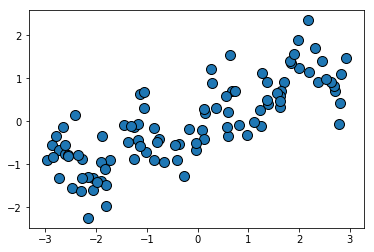

In [24]:
# 예측데이터셋 전체와 반응데이터셋 간 산점도
mglearn.discrete_scatter(X, y)

In [25]:
## mtplotlib의 rcParams에서 특정 폰트를 글로벌 폰트패밀리로 등록

%matplotlib inline
# matplotlib패키지 전체를 mpl로, matplotlib.pyplot모듈을 plt라는 별칭으로 각각 로딩함
import matplotlib as mpl
import matplotlib.pyplot as plt # 그래프 그리는 모듈

mpl.rcParams['font.family'] = 'NanumGothic'
# - 이 노트북 파일에 한해 그래프에 나눔고딕으로 폰트를 기본으로 설정함

plt.rcParams['axes.unicode_minus'] = False 
# - 그래프 축눈금에 마이너스의 경우 출력이 제대로 되기위한 옵션

Text(0, 0.5, '타깃')

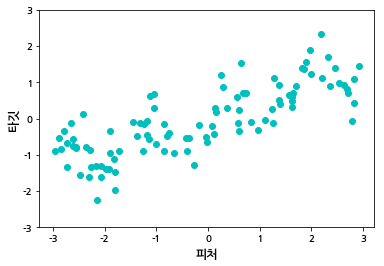

In [26]:
# 예측데이터셋의 각 열과 반응데이터셋 간 산점도
plt.plot(X, y, 'co') # fmt = '[color][marker][line]'
plt.ylim(-3, 3)
plt.xlabel("피처", size = 12)
plt.ylabel("타깃", size = 12)

In [27]:
# matplotlib 패키지의 fmt = '[color][marker][line]' 유형들
import webbrowser
webbrowser.open("https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html")
webbrowser.open("https://matplotlib.org/api/markers_api.html")

True

# 데이터 분할

## (1) 데이터분할 내용을 1개 객체에 요소별로 할당하는 방식

In [28]:
# 데이터분할 메서드 로딩
from sklearn.model_selection import train_test_split
# - sklearn 패키지(라이브러리)의 model_selection 모듈 중에서
#   train_test_split()이라는 메서드(함수)를 메모로리로 로딩함

In [29]:
# 데이터분할 메서드를 활용해 데이터분할 실시
wave_split = train_test_split(X, y, random_state = 0)
# - 분할된 데이터셋을 하나의 객체에 한꺼번에 저장해 놓음

In [30]:
print(type(wave_split)) 
# - 객체유형은 리스트임

print(len(wave_split)) 
# - 분할된 리스트객체에 4개 요소로 구성됨

wave_split
# - 분할된 내용은 리스트객체이며, 4가지 요소별로 
# 배열형식으로 데이터분할이 되었음을 알 수 있음 

<class 'list'>
4


[array([[ 0.28026168],
        [-2.65149833],
        [-2.35265144],
        [-1.01461185],
        [ 1.62762208],
        [-0.66793626],
        [ 2.17862056],
        [-2.28243452],
        [-2.55269614],
        [ 1.65079694],
        [ 0.08540663],
        [-0.40832989],
        [-2.46904499],
        [-0.85948004],
        [ 1.24114406],
        [ 2.70428584],
        [-1.37190581],
        [-2.79366887],
        [-0.02893854],
        [-2.06388816],
        [-1.89957294],
        [ 0.14853859],
        [-2.26777059],
        [ 1.10539816],
        [-2.06403288],
        [ 1.27946872],
        [-1.04801802],
        [-0.75275929],
        [ 2.7937922 ],
        [ 0.55448741],
        [ 2.81750777],
        [ 2.81945911],
        [ 1.85038409],
        [-0.80182894],
        [ 2.63699365],
        [-2.87649303],
        [-1.97685526],
        [-2.15445465],
        [-1.82410283],
        [-2.30478564],
        [-1.04890007],
        [-2.60969044],
        [-1.13410607],
        [-1

In [31]:
# 4개 리스트 요소를 세부 데이터셋으로 할당
X_train = wave_split[0] # 예측(독립)변수의 훈련용 데이터셋
X_test = wave_split[1] # 예측(독립)변수의 테스트용 데이터셋

y_train = wave_split[2] # 반응(종속)변수의 훈련용 데이터셋
y_test = wave_split[3] # 반응(종속)변수의 테스트용 데이터셋

In [32]:
# 데이터셋별 객체유형과 규모

print('예측(독립)변수 전체 데이터셋 객체유형:', type(X))
print('예측(독립)변수 전체 데이터셋 전체규모:', X.shape)

print()

print('예측(독립)변수의 훈련용 데이터셋 객체유형:', type(X_train))
print('예측(독립)변수의 훈련용 데이터셋 객체규모:', X_train.shape) 
print('예측(독립)변수의 테스트용 데이터셋 객체유형:', type(X_test))
print('예측(독립)변수의 테스트용 데이터셋 객체규모:', X_test.shape) 

print()

print('반응(종속)변수의 훈련용 데이터셋 객체유형:', type(y_train))
print('반응(종속)변수의 훈련용 데이터셋 객체규모:', y_train.shape) 
print('반응(종속)변수의 테스트용 데이터셋 객체유형:', type(y_test))
print('반응(종속)변수의 테스트용 데이터셋 객체규모:', y_test.shape) 

예측(독립)변수 전체 데이터셋 객체유형: <class 'numpy.ndarray'>
예측(독립)변수 전체 데이터셋 전체규모: (100, 1)

예측(독립)변수의 훈련용 데이터셋 객체유형: <class 'numpy.ndarray'>
예측(독립)변수의 훈련용 데이터셋 객체규모: (75, 1)
예측(독립)변수의 테스트용 데이터셋 객체유형: <class 'numpy.ndarray'>
예측(독립)변수의 테스트용 데이터셋 객체규모: (25, 1)

반응(종속)변수의 훈련용 데이터셋 객체유형: <class 'numpy.ndarray'>
반응(종속)변수의 훈련용 데이터셋 객체규모: (75,)
반응(종속)변수의 테스트용 데이터셋 객체유형: <class 'numpy.ndarray'>
반응(종속)변수의 테스트용 데이터셋 객체규모: (25,)


## (2) 데이터분할 내용을  여러개 객체에 나누어 각각 할당하는 방식

* 예측(입력, 투입, 설명, 독립)변수는 여러 개로 구성된 2차원 배열(행렬)이므로 대문자 X로 보통 표현함
* 반응(결과, 기대, 종속)변수는 한 개로 구성된 1차원 배열(벡터)이므로 소문자 y로 보통 표현함

In [77]:
# 데이터분할 메서드 로딩
from sklearn.model_selection import train_test_split
# - sklearn 패키지(라이브러리)의 model_selection 모듈 중에서
#   train_test_split()이라는 메서드(함수)를 메모로리로 로딩함

In [78]:
# 데이터분할 실시
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 0)
# - 분할된 데이터셋을 각각의 객체에 별도로 저장해 놓음

# - train_test_split() 메서드는 Numpy 배열형식의 4개 반환값을 생성함
# - 기본적으로 train은 75%, test는 25% 데이터셋을 할당받는데,
#   test_size 매개변수를 통해 테스트셋의 비율을 지정할 수 있음
# - random.state 매개변수를 통해 샘플의 재현성을 확보함

In [79]:
# 데이터셋별 객체유형과 규모

print('예측(독립)변수 전체 데이터셋 객체유형:', type(X))
print('예측(독립)변수 전체 데이터셋 전체규모:', X.shape)

print()

print('예측(독립)변수의 훈련용 데이터셋 객체유형:', type(X_train))
print('예측(독립)변수의 훈련용 데이터셋 객체규모:', X_train.shape) 
print('예측(독립)변수의 테스트용 데이터셋 객체유형:', type(X_test))
print('예측(독립)변수의 테스트용 데이터셋 객체규모:', X_test.shape) 

print()

print('반응(종속)변수의 훈련용 데이터셋 객체유형:', type(y_train))
print('반응(종속)변수의 훈련용 데이터셋 객체규모:', y_train.shape) 
print('반응(종속)변수의 테스트용 데이터셋 객체유형:', type(y_test))
print('반응(종속)변수의 테스트용 데이터셋 객체규모:', y_test.shape) 

예측(독립)변수 전체 데이터셋 객체유형: <class 'numpy.ndarray'>
예측(독립)변수 전체 데이터셋 전체규모: (40, 1)

예측(독립)변수의 훈련용 데이터셋 객체유형: <class 'numpy.ndarray'>
예측(독립)변수의 훈련용 데이터셋 객체규모: (30, 1)
예측(독립)변수의 테스트용 데이터셋 객체유형: <class 'numpy.ndarray'>
예측(독립)변수의 테스트용 데이터셋 객체규모: (10, 1)

반응(종속)변수의 훈련용 데이터셋 객체유형: <class 'numpy.ndarray'>
반응(종속)변수의 훈련용 데이터셋 객체규모: (30,)
반응(종속)변수의 테스트용 데이터셋 객체유형: <class 'numpy.ndarray'>
반응(종속)변수의 테스트용 데이터셋 객체규모: (10,)


# 데이터 탐색

## (1) 기술통계분석을 통한 데이터탐색

In [36]:
# 판다스 패키지(라이브러리)를 pd라는 별칭으로 통째로 로딩함
import pandas as pd

# 훈련용 예측(독립)변수셋을 데이터프레임 형식으로 변경
X_train_df = pd.DataFrame(X_train)

In [1]:
# 훈련용 데이터셋 구조파악
X_train_df.info()

NameError: name 'X_train_df' is not defined

In [38]:
# 훈련용 데이터셋 기술통계분석
X_train_df.describe()

,0
count,75.000000
mean,-0.276140
std,1.787992
min,-2.966867
25%,-1.904312
50%,-0.263580
75%,1.263952
max,2.819459


In [39]:
# 판다스 데이터프레임 조회
X_train_df.loc[0:5, 0]

0    1.850384
1    1.625803
2    0.085407
3   -1.129734
4    1.105398
5    1.813182
Name: 0, dtype: float64

In [40]:
# 판다스 데이터프레임 조회
X_train_df.iloc[:, :].head()

,0
0,1.850384
1,1.625803
2,0.085407
3,-1.129734
4,1.105398


## (2) 그래프를 통한 데이터탐색

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

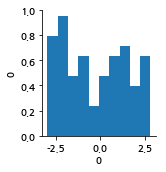

In [42]:
# seaborn(씨본) 패키지 산점도플롯(pairplot)
fig = sb.pairplot(X_train_df)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


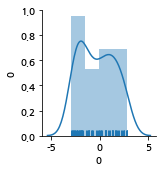

In [43]:
# seaborn(씨본) 패키지 산점도그리드플롯(PairGrid)
pg = sb.PairGrid(X_train_df) 
pg = pg.map_upper(sb.regplot) 
pg = pg.map_lower(sb.kdeplot) 
pg = pg.map_diag(sb.distplot, rug = True) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C84D5E6D8>]],
      dtype=object)

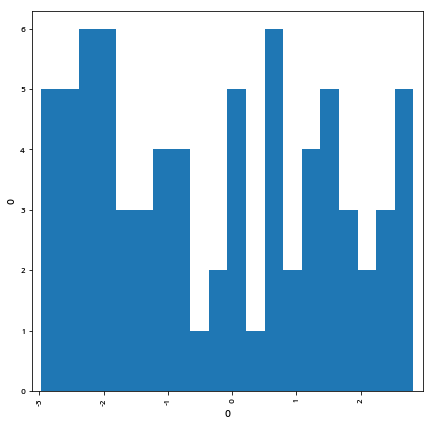

In [44]:
# Pandas(판다스) 패키지 산점도플롯(plotting.scatter_matrix)
import pandas as pd
import mglearn

pd.plotting.scatter_matrix(X_train_df, c = y_train, figsize = (7, 7), marker='o',
                           hist_kwds = {'bins':20}, s = 60, alpha = 0.8, cmap = mglearn.cm3)

# KNN 회귀예측

## (1) sklearn 패키지의 knn 회귀모듈 로딩방법

* 새 데이터포인터(테스트용 데이터 레코드 1개)의 수치예측을 위해서 <br> 훈련데이터셋에서 가장 가까운 특성을 가진 혼련데이터 포인트를 찾음
* knn 기법으로 도출된 특성이 유사한 훈련데이터의 데이터포인트(레코드)들 간의 <br>평균값을 새 데이터포인터의 예측값으로 사용함

#### sklearn(사이킷런) 패키지(라이브러리) 통째로 로딩

In [97]:
# sklearn(사이킷런) 패키지(라이브러리)를 sk라는 별칭으로 로딩
import sklearn as sk

In [98]:
# (실행하지 않고, 점(.)다음에 탭키를 눌러보기) 
# 사이킷런 패키지에 속한 모듈-메서드 확인방법
sk. # 탭키를 눌러 sk 패키지에 속한 모듈 확인이 가능함
sk.neighbors. # 탭키를 눌러 sk 패키지의 neighbors 모듈에 속한 메서드 확인이 가능함
sk.neighbors.KNeighborsRegressor # sk 패키지의 neighbors 모듈에 속한 KNN회귀예측 메서드 사용

SyntaxError: invalid syntax (<ipython-input-98-cdddb8b727df>, line 3)

In [47]:
# knn 회귀객체 생성
knn = sk.neighbors.KNeighborsRegressor(n_neighbors = 3)
print(type(knn))
knn

<class 'sklearn.neighbors.regression.KNeighborsRegressor'>


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

#### sklearn(사이킷런) 패키지의 knn 모듈만을 로딩

In [99]:
# sklearn 패키지의 neighbors 모듈을 skn라는 별칭으로 로딩
import sklearn.neighbors as skn

In [100]:
# (실행하지 않고, 점(.)다음에 탭키를 눌러보기) 
# 사이킷런 패키지에 속한 모듈-메서드 확인방법
skn. # 탭키를 눌러 sk패키지의 neighbors 모듈에 속한 메서드 확인이 가능함
skn.KNeighborsRegressor

SyntaxError: invalid syntax (<ipython-input-100-a91868b45fdb>, line 3)

In [101]:
# knn 회귀객체 생성
knn = skn.KNeighborsRegressor(n_neighbors = 3)
print(type(knn))
knn

<class 'sklearn.neighbors.regression.KNeighborsRegressor'>


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

#### sklearn(사이킷런) 패키지의 knn 모듈 중 knn 회귀예측 메서드만을 로딩

In [102]:
# sklearn 패키지의 neighbors 모듈 중 knn 회귀예측 메서드만을 직접로딩
from sklearn.neighbors import KNeighborsRegressor

In [103]:
# knn 회귀객체 생성
knn = KNeighborsRegressor(n_neighbors = 3)
print(type(knn))
knn

<class 'sklearn.neighbors.regression.KNeighborsRegressor'>


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

## (2) 훈련모델 피팅

In [82]:
# 훈련용 데이터셋을 knn객체에 피팅
knn.fit(X_train, y_train)
# - knn 알고리즘이 들어 있는 회귀객체에 훈련데이터셋을 피팅해 예측모델을 생성함
# - 앞서 생성한 knn객체에 훈련데이터 X, y 훈련세트가 투입피팅되면서 회귀규칙을 새롭게 생성한 것임
# - 이 회귀규칙은 knn.fit에 들어 있는 것이 아니라 knn이라는 원래 객체가 업데이트가 된 것임
# - 결국 .fit()은 일종의 메서드이므로 knn.fit이라는 객체가 만들어진 것이 아니며,
#   후속작업에서 테스트데이터를 피팅할 때 knn이라는 객체에 투입해야함

# - 만일 knn_k1 = knn.fit(X_train, y_train)이라고 코딩했다면,
#   기존의 knn객체는 그냥 k=1이라는 파라미터만 설정된 객체이며, 훈련데이터 피팅을 통한 회귀규칙이 들어 있지 않게됨
# - 즉, knn_k1이라는 객체에 knn(k=1)이라는 파라미터 설정으로 X, y훈련세트를 피팅해 도출한 회귀규칙이 들어 있는 것임

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

## (3) 예측모델 평가

#### 훈련데이터셋을 활용한 예측결과 도출

In [83]:
# knn 객체에 테스트데이터를 피팅해 훈련모델의 성능을 평가함
y_train_pred = knn.predict(X_train)

print('훈련모델의 훈련셋 예측결과: \n', y_train_pred)
print()
print('실제 훈련셋의 반응(종속)변수내용: \n', y_train)

훈련모델의 훈련셋 예측결과: 
 [-0.272  1.375 -1.139  0.421 -0.447  0.357  0.912 -0.054 -0.054  0.357
 -1.44  -1.894 -0.272 -1.631  0.912  1.375 -1.139  0.912 -1.44   1.375
 -2.077 -0.065 -1.139 -0.085 -1.894 -0.054  0.421  0.421  0.357 -0.086]

실제 훈련셋의 반응(종속)변수내용: 
 [ 0.698  1.877 -1.415  0.779  0.094  0.035  0.869  0.084  0.095  1.
 -1.514 -2.472 -0.527 -1.673  1.537  1.494 -0.474  0.331 -1.135  0.754
 -2.086 -0.986 -1.527  0.098 -1.125 -0.341  0.23   0.254  0.035 -0.448]


In [84]:
# 주피터 노트북 소수자리출력 정밀도조정: 실제 데에터값 변화와는 무관함
%precision 3
# - 소수 3째 자리까지 출력

'%.3f'

In [85]:
%precision % r
# - 원래 소수자리로 출력

'% r'

#### 훈련셋 예측모델 성능평가

In [86]:
# 훈련셋 예측모델 설명력 계산: 결정계수(coef: coefficient of determination)
import numpy as np
train_score = knn.score(X_train, y_train)

# 훈련셋 예측모델 정확도 계산: 평균제곱오차(MSE: Mean Square Error)
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_train_pred)

# 훈련셋 예측모델 성능평가 결과

# 기본 문자열 포맷팅
print('훈련셋 예측모델 설명력 R^2(결정계수): %0.3f' % train_score)
print('훈련셋 예측모델 평균제곱오차(MSE): %0.3f' % train_mse)
print()

# .format()메서드 포맷팅
print('훈련셋 예측모델 설명력 R^2(결정계수): {:.3f}'.format(train_score))
print('훈련셋 예측모델 평균제곱오차(MSE): {:.3f}'.format(train_mse))
print()

# f문자열 포맷팅
print('훈련셋 예측모델 설명력 R^2(결정계수): {:.3f}'.format(train_score))
print(f'훈련셋 예측모델 평균제곱오차(MSE): {train_mse:.3f}')

훈련셋 예측모델 설명력 R^2(결정계수): 0.819
훈련셋 예측모델 평균제곱오차(MSE): 0.211

훈련셋 예측모델 설명력 R^2(결정계수): 0.819
훈련셋 예측모델 평균제곱오차(MSE): 0.211

훈련셋 예측모델 설명력 R^2(결정계수): 0.819
훈련셋 예측모델 평균제곱오차(MSE): 0.211


#### 테스트셋을 활용한 예측결과 도출

In [87]:
# knn 객체에 테스트데이터를 피팅해 훈련모델의 성능을 평가함
y_test_pred = knn.predict(X_test)

print('훈련모델의 테스트셋 예측결과: \n', y_test_pred)
print()
print('실제 테스트셋의 반응(종속)변수내용: \n', y_test)

훈련모델의 테스트셋 예측결과: 
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]

실제 테스트셋의 반응(종속)변수내용: 
 [ 0.373  0.218  0.967 -1.388 -1.06  -0.905  0.437  0.779 -0.541 -0.957]


#### 테스트셋 예측모델 성능평가

In [88]:
# 테스트셋 예측모델 설명력 계산: 결정계수(coef: coefficient of determination)
import numpy as np
test_score = knn.score(X_test, y_test)

# 테스트셋 예측모델 정확도 계산: 평균제곱오차(MSE: Mean Square Error)
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_test_pred)

# 테스트셋 예측모델 성능평가 결과

# 기본 문자열 포맷팅
print('테스트셋 예측모델 설명력 R^2(결정계수): %.3f' % test_score)
print('테스트셋 예측모델 평균제곱오차(MSE): %.3f' % test_mse)
print()

# .format()메서드 포맷팅
print('테스트셋 예측모델 설명력 R^2(결정계수): {:.3f}'.format(test_score))
print('테스트셋 예측모델 평균제곱오차(MSE): {:.3f}'.format(test_mse))
print()

# f문자열 포맷팅
print('테스트셋 예측모델 설명력 R^2(결정계수): {:.3f}'.format(test_score))
print(f'테스트셋 예측모델 평균제곱오차(MSE): {test_mse:.3f}')

테스트셋 예측모델 설명력 R^2(결정계수): 0.834
테스트셋 예측모델 평균제곱오차(MSE): 0.109

테스트셋 예측모델 설명력 R^2(결정계수): 0.834
테스트셋 예측모델 평균제곱오차(MSE): 0.109

테스트셋 예측모델 설명력 R^2(결정계수): 0.834
테스트셋 예측모델 평균제곱오차(MSE): 0.109


# 최근접 이웃의 갯수를 다양하게 설정

#### n_neighbors의 갯수를 조절해 모델의 복잡도와 정확도를 조정함
* 이웃의 갯수가 적을수록: 복잡한 모델, 과대적합<br> - 훈련데이터에만 정확하고, 테스트데이터에는 오차가 많은 과대적합 가능성이 큼
* 이웃의 갯수가 많을수록: 단순한 모델, 과소적합<br> - 훈련모델 자체의 정확도가 낮아서 테스트데이터의 예측값도 오차가 많은 과소적합 가능성 큼

### (참고) np.linespace메서드

In [89]:
# 예측(독립)변수 범위를 기준으로 예측선을 그리는데 사용하기 위한 X축 변수 데이터생성 
line = np.linspace(-3, 3, 1000)
line
# -3에서 3에속한 1000개의 요소가 배열형식으로 5개 열에 걸쳐서 생성됨

array([-3.   , -2.994, -2.988, -2.982, -2.976, -2.97 , -2.964, -2.958,
       -2.952, -2.946, -2.94 , -2.934, -2.928, -2.922, -2.916, -2.91 ,
       -2.904, -2.898, -2.892, -2.886, -2.88 , -2.874, -2.868, -2.862,
       -2.856, -2.85 , -2.844, -2.838, -2.832, -2.826, -2.82 , -2.814,
       -2.808, -2.802, -2.796, -2.79 , -2.784, -2.778, -2.772, -2.766,
       -2.76 , -2.754, -2.748, -2.742, -2.736, -2.73 , -2.724, -2.718,
       -2.712, -2.706, -2.7  , -2.694, -2.688, -2.682, -2.676, -2.67 ,
       -2.664, -2.658, -2.652, -2.646, -2.64 , -2.634, -2.628, -2.622,
       -2.616, -2.61 , -2.604, -2.598, -2.592, -2.586, -2.58 , -2.574,
       -2.568, -2.562, -2.556, -2.55 , -2.544, -2.538, -2.532, -2.526,
       -2.52 , -2.514, -2.508, -2.502, -2.495, -2.489, -2.483, -2.477,
       -2.471, -2.465, -2.459, -2.453, -2.447, -2.441, -2.435, -2.429,
       -2.423, -2.417, -2.411, -2.405, -2.399, -2.393, -2.387, -2.381,
       -2.375, -2.369, -2.363, -2.357, -2.351, -2.345, -2.339, -2.333,
      

In [90]:
sp.stats.describe(line) # 간단한 기술통계량 조회

DescribeResult(nobs=1000, minmax=(-3.0, 3.0), mean=0.0, variance=3.0090150210270328, skewness=-8.725401331905205e-17, kurtosis=-1.2000024000024003)

In [91]:
line = line.reshape(-1, 1) 
line
# - reshape()메서드를 사용해 5개 열에걸치 배열형식을
#   1개 열로 재구성해 X축 변수로 전체적으로 사용할 수 있도록 함

array([[-3.   ],
       [-2.994],
       [-2.988],
       [-2.982],
       [-2.976],
       [-2.97 ],
       [-2.964],
       [-2.958],
       [-2.952],
       [-2.946],
       [-2.94 ],
       [-2.934],
       [-2.928],
       [-2.922],
       [-2.916],
       [-2.91 ],
       [-2.904],
       [-2.898],
       [-2.892],
       [-2.886],
       [-2.88 ],
       [-2.874],
       [-2.868],
       [-2.862],
       [-2.856],
       [-2.85 ],
       [-2.844],
       [-2.838],
       [-2.832],
       [-2.826],
       [-2.82 ],
       [-2.814],
       [-2.808],
       [-2.802],
       [-2.796],
       [-2.79 ],
       [-2.784],
       [-2.778],
       [-2.772],
       [-2.766],
       [-2.76 ],
       [-2.754],
       [-2.748],
       [-2.742],
       [-2.736],
       [-2.73 ],
       [-2.724],
       [-2.718],
       [-2.712],
       [-2.706],
       [-2.7  ],
       [-2.694],
       [-2.688],
       [-2.682],
       [-2.676],
       [-2.67 ],
       [-2.664],
       [-2.658],
       [-2.652

In [92]:
sp.stats.describe(line) # 동일한 기술통계량임

DescribeResult(nobs=1000, minmax=(array([-3.]), array([3.])), mean=array([0.]), variance=array([3.009]), skewness=array([-8.725e-17]), kurtosis=array([-1.2]))

### n_neighbors 다양한 설정모델을 한번에 그리기

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

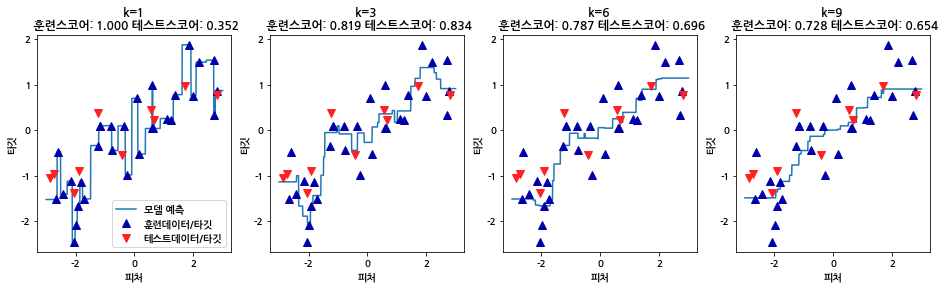

In [96]:
#  이웃의 갯수에 따른 예측
fig, axes = plt.subplots(1, 4, figsize = (16, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for k, ax in zip([1, 3, 6, 9], axes):
    # knn 회귀모델 객체생성
    knn = KNeighborsRegressor(n_neighbors = k)
    # 훈련데이터 피팅실시
    knn.fit(X_train, y_train)
    
    # linespace()메서드로 생성한 임의의 값들을 이용해 예측선 작성
    ax.plot(line, knn.predict(line))
    
    # 훈련데이터 플롯팅
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)

    # 테스트데이터 플롯팅
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title('k=%d \n 훈련스코어: %0.3f 테스트스코어: %0.3f' % 
                 (k, knn.score(X_train, y_train), knn.score(X_test, y_test)))
    ax.set_xlabel('피처')
    ax.set_ylabel('타깃')
    
axes[0].legend(['모델 예측', '훈련데이터/타깃', '테스트데이터/타깃'], loc = 'best')

# - k이웃값이 하나일 경우에 훈련셋의 각 데이터 포인트가 예측모델에 주는 영향력이 커지게 되며,
#   예측값이 훈련셋 데이터 포인트를 모두 지나가게 되는 예측선이 만들어짐
# - 이것은 훈련데이터셋의 설명력은 매우 높지만, 테스트셋이 주어지면 예측력이 불안정 할 수 있음

# - k이웃값을 많이 사용할 경우에는 각 데이터 포인트가 예측모델에 주는 영향력이 감소하게 되며, 
#   훈련셋 여러 개 이웃의 평균값으로 예측선이 만들어 짐
# - 이것은 훈련데이터셋의 설명력은 다소 낮아지지만, 테스트셋이 주어지면 더 안정적인 예측결과를 얻을 수 있게 됨 

- k를 늘릴 때마다 훈련스코어가 underfitting됨. 그러한 상태로 테스트스코어를 하다보니 더 정확성이 떨어져
- k = 3이 그나마 제일 나은데, k=2로 과대적합해도 괜찮다.

# End of Source